In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import readsav

import tol_colors
from scipy.interpolate import interp1d
from scipy.signal import convolve


In [4]:
filename='/Users/coletamburri/Desktop/radynout.sav'
filename_dkist = '/Users/coletamburri/Desktop/RH_Versions_and_Tools/RH_output_files_npz/dkist_obs_file.npz'



In [6]:
read = readsav(filename)

In [8]:
dkist_file = np.load(filename_dkist)
dkist_wl = dkist_file['arr_2']

In [10]:
np.shape(read['tg1t'])

(501, 300)

In [12]:
import astropy.units as u
from astropy.coordinates import SpectralCoord
import astropy
def veltrans(x):
    return ((((x+lamb0)/lamb0)-1)*c)/mu

def veltrans2(x):
    return ((((x+lamb0)/lamb0)-1)*c)/mu2

def wltrans(x):
    return ((((x/c)+1)*lamb0)-lamb0)

def gaussian_psf(x, fwhm):
	#x = wavelength [nm]
	# fwhm in [nm]
    sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))  # Calculate sigma from FWHM
    tr = np.exp(-(x)**2 / (2 * (sigma**2)))
    tr /= tr.sum()
    return tr
#write adjustment for point spread function from atlas
def psf_adjust(wlsel,ilamsel,fwhm,new_dispersion_range,ntw,gaussian_psf):
    func=interp1d(wlsel,ilamsel,kind='linear',fill_value='extrapolate')
    yatlas = func(new_dispersion_range)
    dw=new_dispersion_range[1]-new_dispersion_range[0]
    dw=dw
    tw=(np.arange(ntw)-ntw//2)*dw
    
    for i in range(1):

    	psf = gaussian_psf(tw, fwhm) # guassian transmission profiles
    	yconv = convolve(yatlas, psf, mode='same', method='fft')
        
    return yconv


def doppler_shift_to_wavelength(observed_wavelength, velocity):
    """
    Converts observed wavelength to rest wavelength using the Doppler shift formula.

    Parameters:
        observed_wavelength: The observed wavelength in Angstroms (u.AA)
        velocity: The velocity of the object in km/s (u.km/s)

    Returns:
        rest_wavelength: The rest wavelength in Angstroms (u.AA)
    """

    observed_wavelength = observed_wavelength * u.nm
    velocity = velocity * u.km / u.second

    rest_wavelength = (observed_wavelength / (1 + velocity / astropy.constants.c)) - observed_wavelength

    return rest_wavelength.to(u.nm)

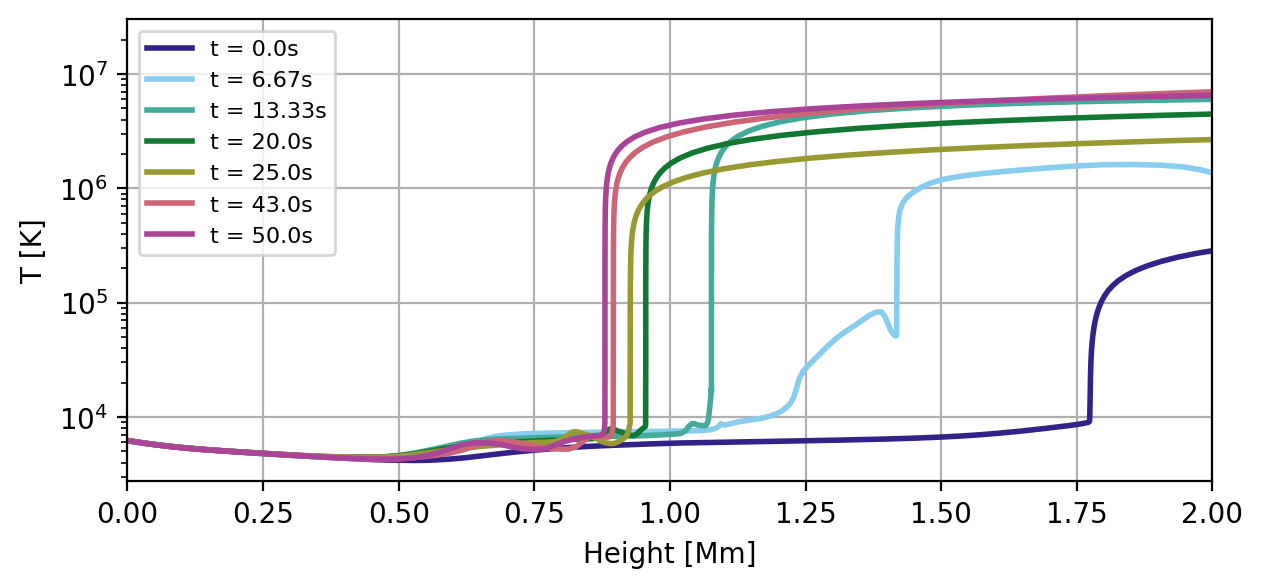

In [39]:
timesinit = np.linspace(0,200,4)
times2 = [250,430,500]

ncol2 = len(timesinit)+len(times2)
map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol2)
cmap_choice2 = map(np.linspace(0,1,ncol2))

cmap_choice2 = ['#332288','#88CCEE','#44AA99','#117733','#999933','#CC6677','#AA4499']

fig,ax=plt.subplots(dpi=200,figsize=(7,3))
for i in range(len(timesinit)):
    ax.plot(read['z1t'][int(timesinit[i]),:]/1e8,(read['tg1t'][int(timesinit[i]),:]),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=2)

for i in range(len(times2)):
    ax.plot(read['z1t'][int(times2[i]),:]/1e8,(read['tg1t'][int(times2[i]),:]),color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=2)

ax.grid()
ax.legend(fontsize=8)
ax.set_ylabel('T [K]')
ax.set_xlabel('Height [Mm]')
ax.set_xlim([0,2])
plt.yscale('log')

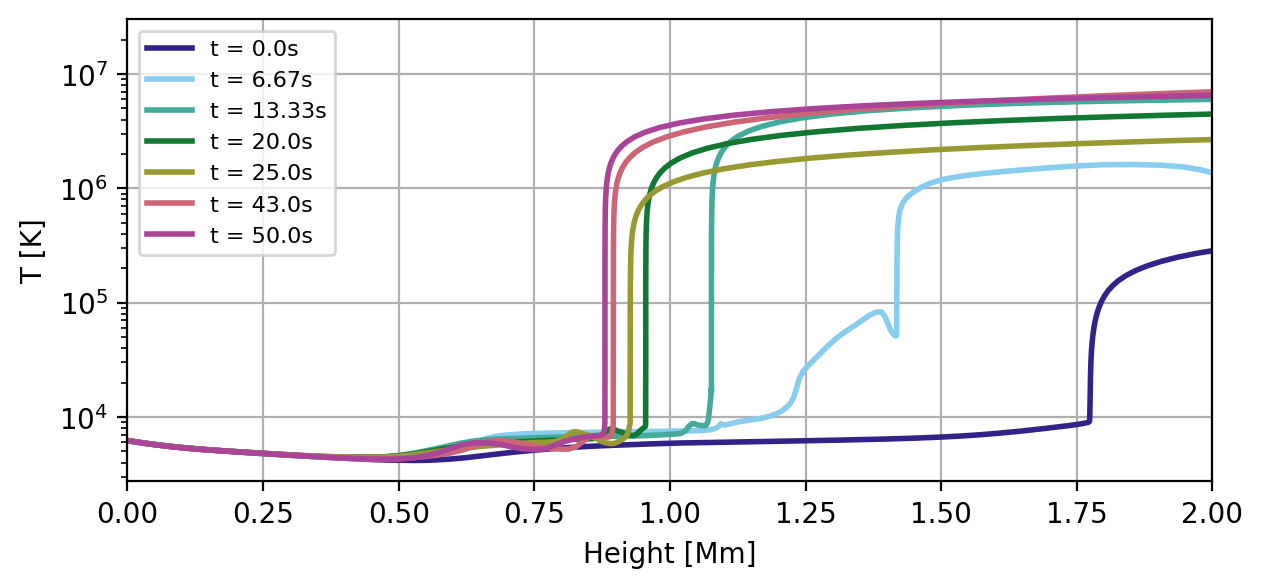

In [41]:
timesinit = np.linspace(0,200,4)
times2 = [250,430,500]

ncol2 = len(timesinit)+len(times2)
map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol2)
cmap_choice2 = map(np.linspace(0,1,ncol2))

cmap_choice2 = ['#332288','#88CCEE','#44AA99','#117733','#999933','#CC6677','#AA4499']

fig,ax=plt.subplots(dpi=200,figsize=(7,3))
for i in range(len(timesinit)):
    ax.plot(read['z1t'][int(timesinit[i]),:]/1e8,(read['tg1t'][int(timesinit[i]),:]),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=2)

for i in range(len(times2)):
    ax.plot(read['z1t'][int(times2[i]),:]/1e8,(read['tg1t'][int(times2[i]),:]),color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=2)

ax.grid()
ax.legend(fontsize=8)
ax.set_ylabel('T [K]')
ax.set_xlabel('Height [Mm]')
ax.set_xlim([0,2])
plt.yscale('log')

(0.0, 2.0)

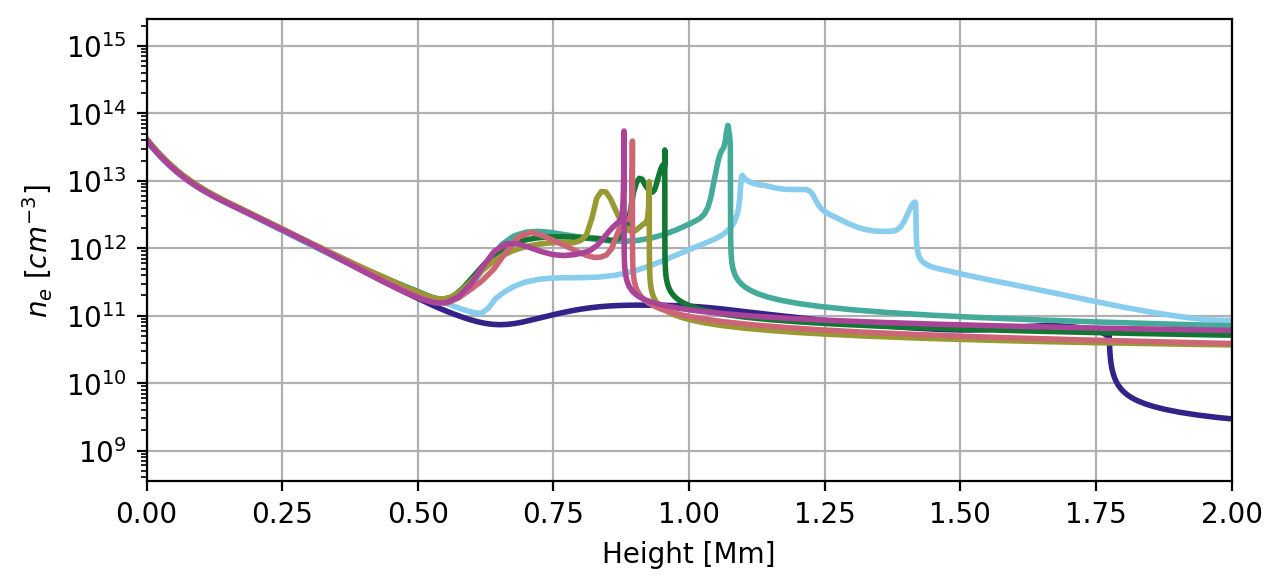

In [43]:
timesinit = np.linspace(0,200,4)
times2 = [250,430,500]

fig,ax=plt.subplots(dpi=200,figsize=(7,3))
for i in range(len(timesinit)):
    ax.plot(read['z1t'][int(timesinit[i]),:]/1e8,(read['ne1t'][int(timesinit[i]),:]),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=2)

for i in range(len(times2)):
    ax.plot(read['z1t'][int(times2[i]),:]/1e8,(read['ne1t'][int(times2[i]),:]),color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=2)

ax.grid()
#ax.legend()
ax.set_ylabel(r'$n_e$ [$cm^{-3}$]')
ax.set_xlabel('Height [Mm]')
#ax.set_xlim([-.5,4])
plt.yscale('log')
ax.set_xlim([0,2])


In [29]:
def tosi(self, wav, s):
    clight=2.99792458e8      #speed of light [m/s]                                  
    aa_to_m=1e-10                                                                        
    cm_to_m=1e-2                       
    s /= cm_to_m**2 * aa_to_m # from from Watt /(s cm2 ster AA) to Watt/(s m2 ster m) 
    s *= (wav*aa_to_m)**2 / clight # to Watt/(s m2 Hz ster)
    return s

In [31]:
# I think 1.9e11 is the conversion...

In [33]:
q = read['q']
nq = read['nq']
qnorm = read['qnorm']
outintt = read['outintt']
nmu = read['nmu']
#q[0:nq[kr]-1,kr]*qnorm,outintt[1:nq[kr],nmu-1,kr,*]

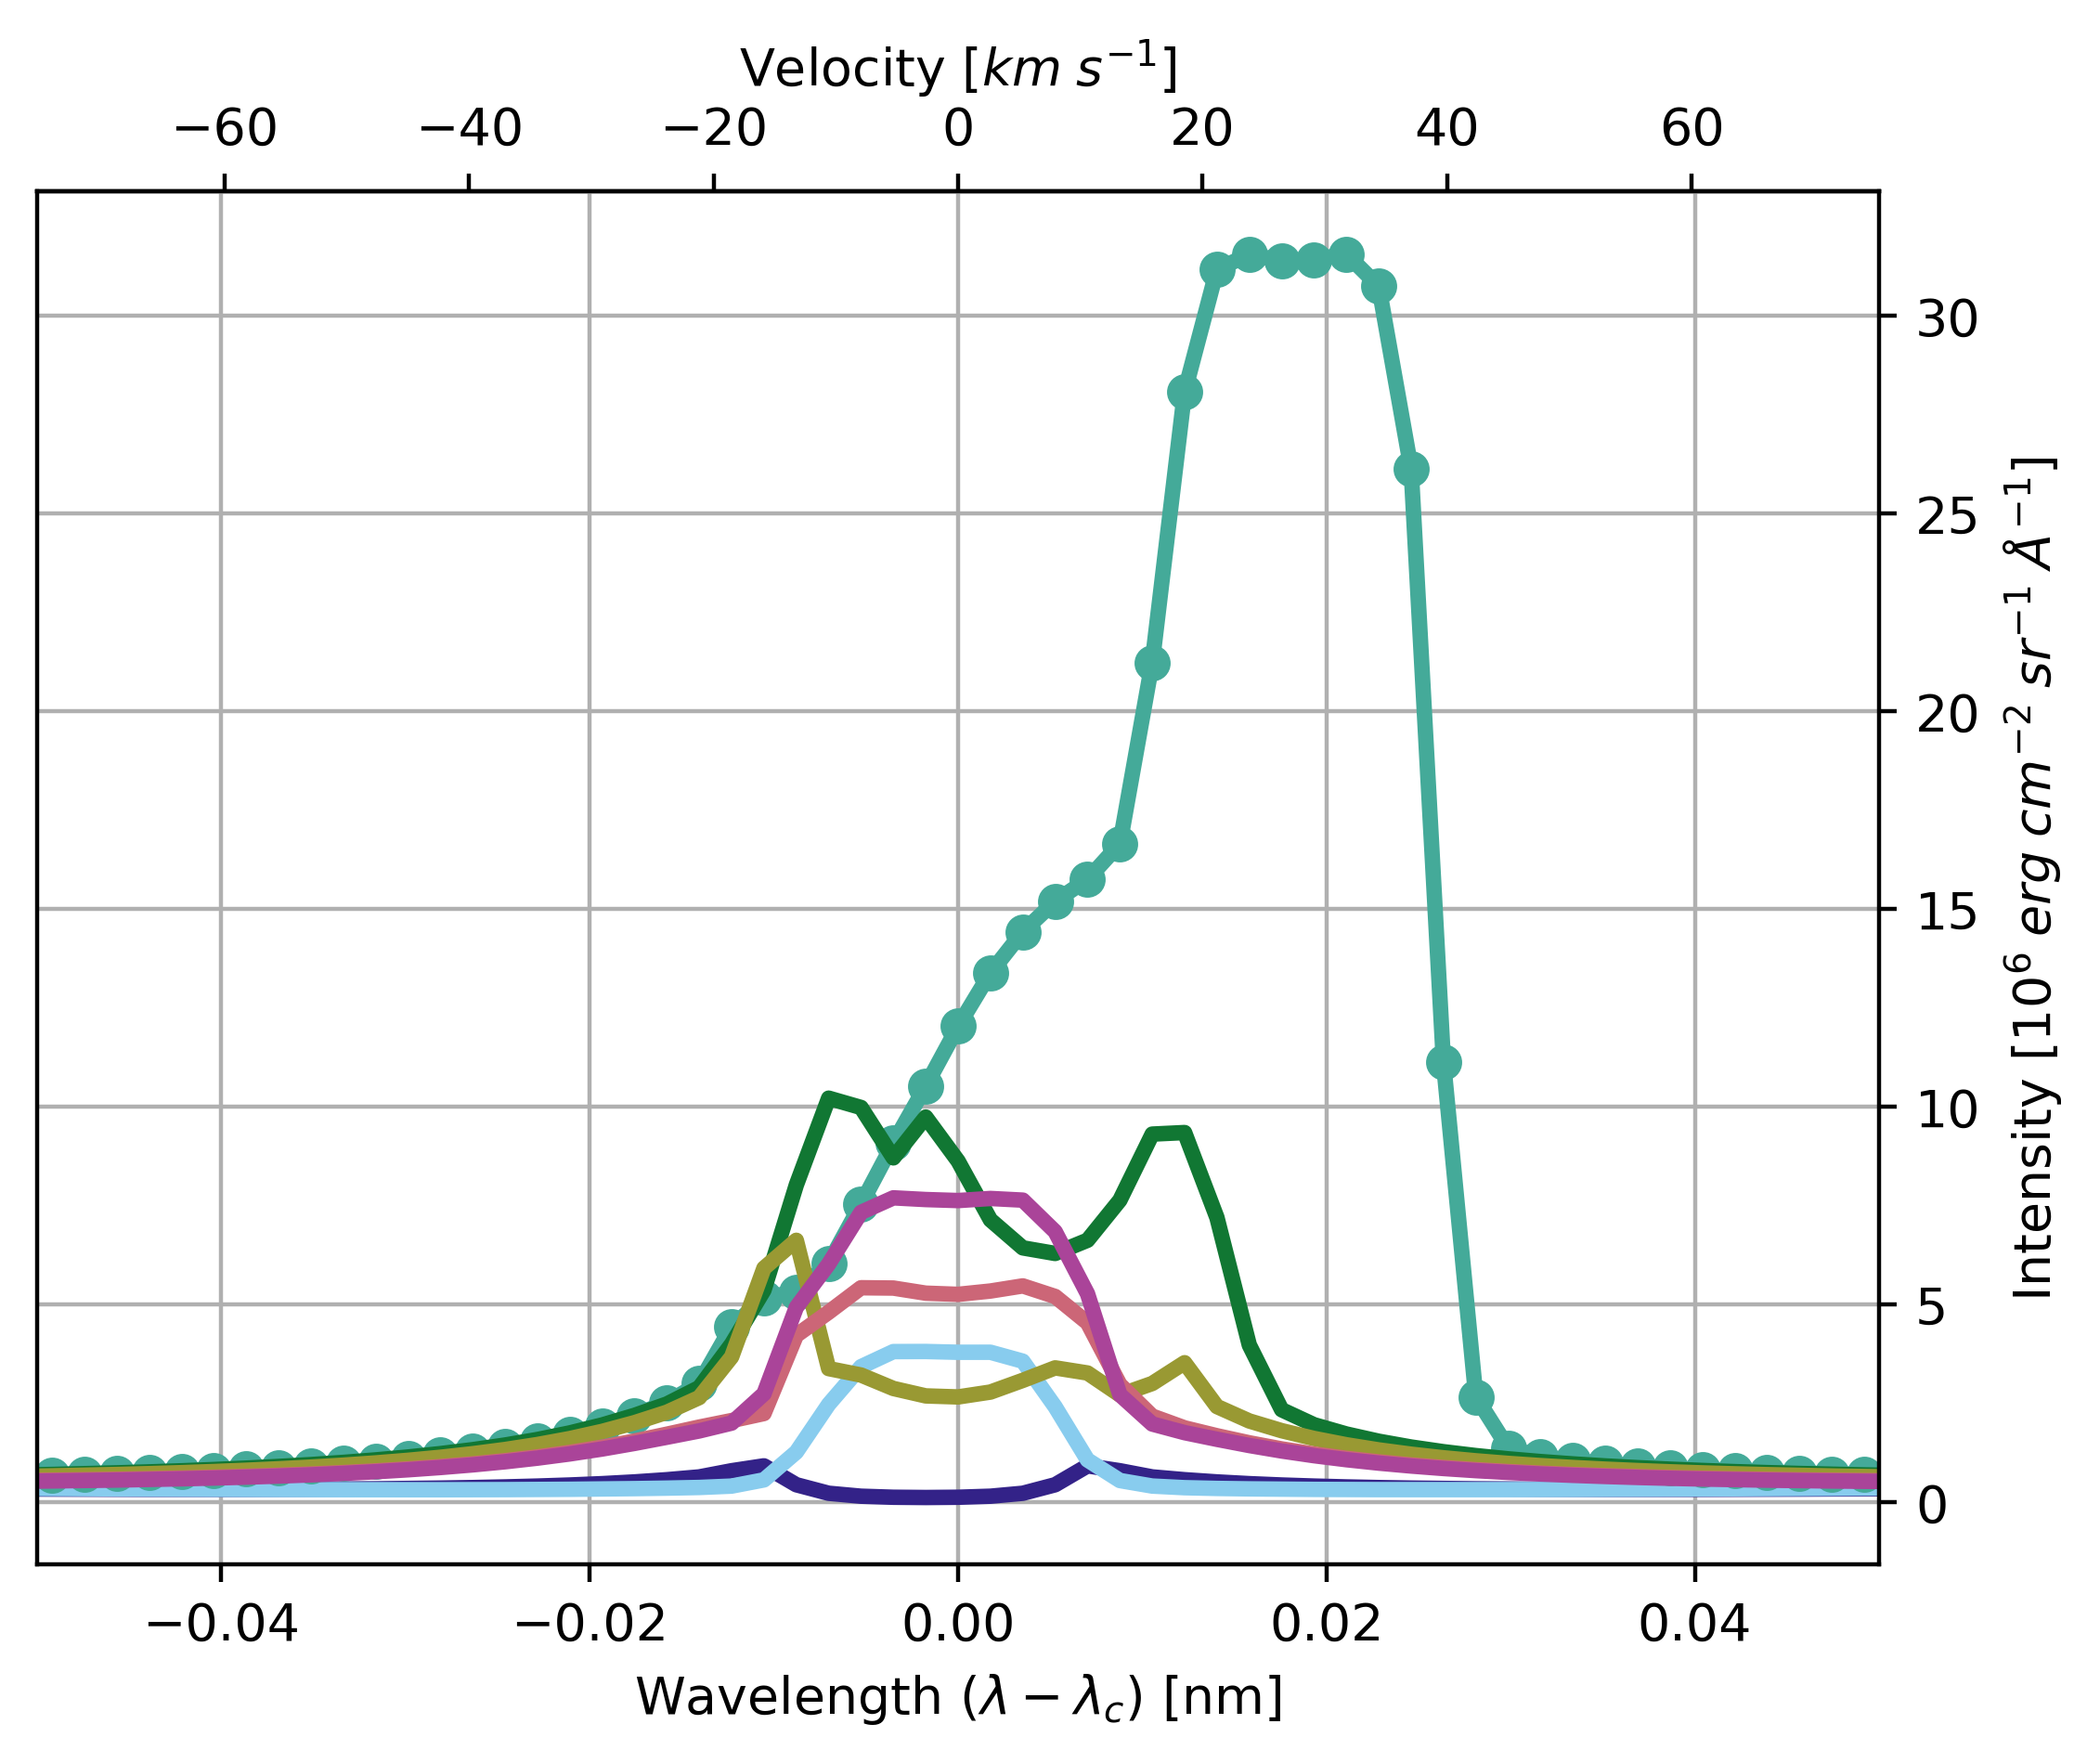

In [37]:
kr=16
timesinit = np.linspace(0,200,4)
times2 = [250,430,500]
lamb0=396.846
c=2.99e5
mu=.5
fwhm=.05
ntw=45

cmap_choice2 = ['#332288','#88CCEE','#44AA99','#117733','#999933','#CC6677','#AA4499']


wavelengths = (doppler_shift_to_wavelength(396.846,q[kr,:]*qnorm))

fig,ax=plt.subplots(dpi=400)
for i in range(len(timesinit)):
    if i==2:
        ax.plot((doppler_shift_to_wavelength(396.846,q[kr,:]*qnorm)),psf_adjust(wavelengths/u.nm, outintt[int(timesinit[i]),kr,2,:-1]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6,marker='o',color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)
    else:
        ax.plot((doppler_shift_to_wavelength(396.846,q[kr,:]*qnorm)),psf_adjust(wavelengths/u.nm, outintt[int(timesinit[i]),kr,2,:-1]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6,color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=3)
       
    ax.set_xlim([.05,-.05])
for i in range(len(times2)):
    ax.plot((doppler_shift_to_wavelength(396.846,q[kr,:]*qnorm)),psf_adjust(wavelengths/u.nm, outintt[int(times2[i]),kr,2,:-1]*1.9e11,fwhm,wavelengths/u.nm,ntw,gaussian_psf)/1e6,color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=3)
plt.gca().invert_xaxis()
#ax.legend()
#ax.axvline(0,c='black')
ax.grid()
ax.set_ylabel(r'Intensity [$10^6\;erg\;cm^{-2}\;sr^{-1}\;\AA^{-1}$]')
secaxx = ax.secondary_xaxis('top', functions=(veltrans,wltrans))
secaxx.set_xlabel(r'Velocity $[km\; s^{-1}]$')
ax.set_xlabel(r'Wavelength ($\lambda - \lambda_c$) [nm]')
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()

In [113]:
%matplotlib inline
timesinit = np.linspace(0,200,4)
times2 = [250,430,500]

ncol2 = len(timesinit)+len(times2)
map = tol_colors.tol_cmap(colormap='rainbow_discrete',lut=ncol2)
cmap_choice2 = map(np.linspace(0,1,ncol2))

fig,ax=plt.subplots(dpi=200,figsize=(7,3))
for i in range(len(timesinit)):
    ax.plot(read['z1t'][int(timesinit[i]),:]/1e8,(read['ne1t'][int(timesinit[i]),:]),color=cmap_choice2[i],label='t = '+str(round(timesinit[i]/10,2))+'s',linewidth=2)

for i in range(len(times2)):
    ax.plot(read['z1t'][int(times2[i]),:]/1e8,(read['ne1t'][int(times2[i]),:]),color=cmap_choice2[len(timesinit)+i],label='t = '+str(round(times2[i]/10,2))+'s',linewidth=2)

ax.grid()
#ax.legend()
ax.set_ylabel(r'$n_e$ [$cm^{-3}$]')
ax.set_xlabel('Height [Mm]')
#ax.set_xlim([-.5,4])
plt.yscale('log')

In [87]:
outintt[1:nq[kr],nmu-1,kr,:]

IndexError: index 16 is out of bounds for axis 2 with size 5

In [103]:
np.shape(outintt)

(501, 41, 5, 202)

In [95]:
np.shape(q)

(41, 201)